In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer # The MICE implementation

# Load the exposed data
df = pd.read_csv('../data/processed/pima_exposed.csv')
features = df.drop(columns=['Outcome'])
target = df['Outcome']

In [5]:
# Tier 1: Baseline (Mean Imputation) - Often creates artificial 'spikes'
mean_imputer = SimpleImputer(strategy='mean')
df_mean = pd.DataFrame(mean_imputer.fit_transform(features), columns=features.columns)

# Tier 2: KNN Imputation - Uses local similarities
knn_imputer = KNNImputer(n_neighbors=5)
df_knn = pd.DataFrame(knn_imputer.fit_transform(features), columns=features.columns)

# Tier 3: MICE (Multivariate Imputation by Chained Equations) - Research Standard
# It models each feature as a function of others.
mice_imputer = IterativeImputer(random_state=42, max_iter=10)
df_mice = pd.DataFrame(mice_imputer.fit_transform(features), columns=features.columns)

print("✅ Imputation Benchmarking Complete: Mean, KNN, and MICE datasets generated.")

✅ Imputation Benchmarking Complete: Mean, KNN, and MICE datasets generated.


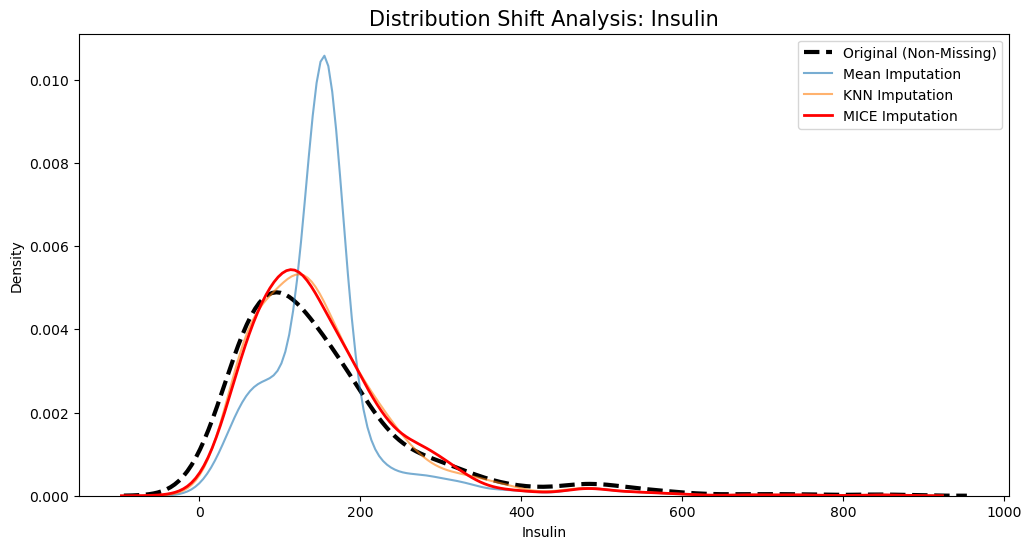

In [6]:
def plot_imputation_comparison(original_df, imputed_dfs, feature_name):
    plt.figure(figsize=(12, 6))
    
    # Original (with NaNs dropped for plotting)
    sns.kdeplot(original_df[feature_name].dropna(), label='Original (Non-Missing)', color='black', lw=3, ls='--')
    
    # Compare Imputed Distributions
    sns.kdeplot(imputed_dfs['Mean'][feature_name], label='Mean Imputation', alpha=0.6)
    sns.kdeplot(imputed_dfs['KNN'][feature_name], label='KNN Imputation', alpha=0.6)
    sns.kdeplot(imputed_dfs['MICE'][feature_name], label='MICE Imputation', color='red', lw=2)
    
    plt.title(f"Distribution Shift Analysis: {feature_name}", fontsize=15)
    plt.xlabel(feature_name)
    plt.legend()
    plt.savefig(f'../reports/figures/imputation_shift_{feature_name}.png')
    plt.show()

imputed_sets = {'Mean': df_mean, 'KNN': df_knn, 'MICE': df_mice}
plot_imputation_comparison(features, imputed_sets, 'Insulin')

In [7]:
# Save the MICE-imputed data for Project #3 final modeling
df_mice['Outcome'] = target
df_mice.to_csv('../data/processed/pima_mice_imputed.csv', index=False)
print("💾 Research-grade dataset (MICE) saved for final modeling.")

💾 Research-grade dataset (MICE) saved for final modeling.


In [8]:
# Ensure the Outcome column is attached to all versions for the final model
df_mean['Outcome'] = target
df_knn['Outcome'] = target
# (MICE should already have it from the previous step)

# Save the full benchmark suite
df_mean.to_csv('../data/processed/pima_mean_imputed.csv', index=False)
df_knn.to_csv('../data/processed/pima_knn_imputed.csv', index=False)

print("💾 All benchmark datasets saved: Mean, KNN, and MICE.")

💾 All benchmark datasets saved: Mean, KNN, and MICE.
